In [2]:
import pandas as pd
import numpy as np

# Fixing the voltage reconstruction: we want V(x, t) as a 2D array [x, t]
V_xt = np.zeros((len(x), len(t_eval)))
for n in range(num_modes):
    V_xt += np.outer(phi_n(n + 1, x), sol.y[n])

# Convert to a DataFrame for display
df = pd.DataFrame(V_xt.T, columns=[f"x={round(val, 2)}" for val in x])
tools.display_dataframe_to_user(name="Voltage Dynamics from Synaptic Rotations", dataframe=df)


NameError: name 'x' is not defined

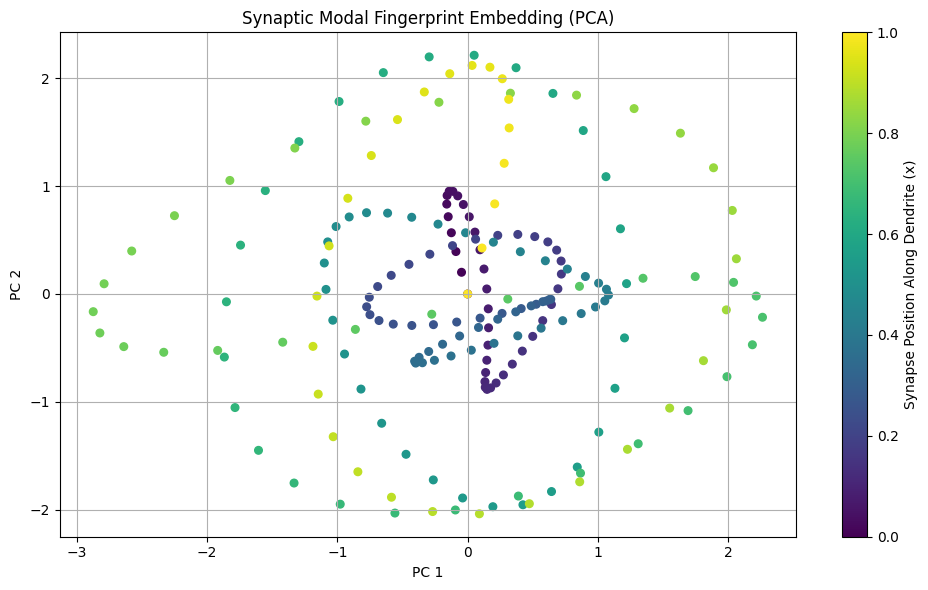

In [5]:
# Combine everything into a full standalone script to generate the figure

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Cable parameters
L = 1.0  # length of dendrite (normalized)
num_synapses = 200  # number of synapses to embed
num_modes = 20  # number of eigenmodes to use

# Define eigenfunctions for zero-Dirichlet cable equation
def phi_n(n, x):
    return np.sqrt(2) * np.sin(n * np.pi * x)

# Compute modal fingerprint for a synapse at position x0
def synapse_projection(x0, num_modes):
    return np.array([phi_n(n, x0) for n in range(1, num_modes + 1)])

# Sample synapse positions along the cable
synapse_positions = np.linspace(0, L, num_synapses)

# Compute fingerprints for each synapse
fingerprints = np.array([
    synapse_projection(pos, num_modes) for pos in synapse_positions
])

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
fingerprints_2d = pca.fit_transform(fingerprints)

# Plotting
plt.figure(figsize=(10, 6))
sc = plt.scatter(fingerprints_2d[:, 0], fingerprints_2d[:, 1],
                 c=synapse_positions, cmap='viridis', s=30)
plt.colorbar(sc, label="Synapse Position Along Dendrite (x)")
plt.title("Synaptic Modal Fingerprint Embedding (PCA)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.tight_layout()
plt.show()


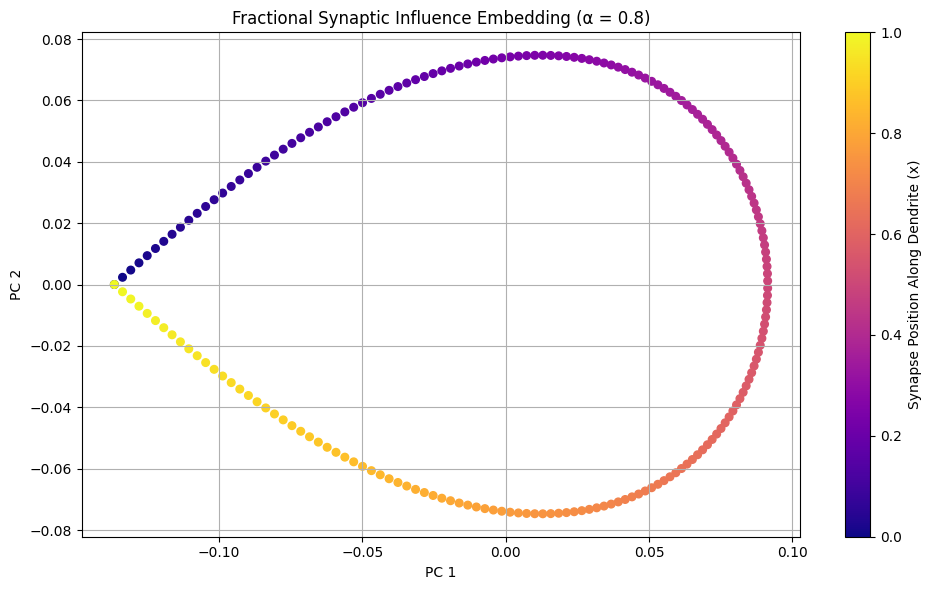

In [6]:
# Re-run necessary imports and code after execution environment reset

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Parameters
L = 1.0  # dendrite length
num_synapses = 200
num_modes = 20
alpha = 0.8  # fractional order of spatial derivative

# Discretize space
x = np.linspace(0, L, num_synapses)

# Define the fractional eigenfunctions and eigenvalues for Dirichlet BCs
# Approximate method: eigenfunctions are still sinusoids, but eigenvalues are raised to fractional power
def phi_n(n, x):
    return np.sqrt(2) * np.sin(n * np.pi * x)

def lambda_n(n, alpha):
    return (n * np.pi)**(2 * alpha)  # approximate fractional Laplacian eigenvalue

# Modal fingerprint: projection of synapse at x0 into fractional modes
def fractional_synapse_projection(x0, num_modes, alpha):
    return np.array([phi_n(n, x0) / lambda_n(n, alpha) for n in range(1, num_modes + 1)])

# Compute fingerprints for all synapses
fingerprints = np.array([
    fractional_synapse_projection(pos, num_modes, alpha) for pos in x
])

# PCA for visualization
pca = PCA(n_components=2)
fingerprints_2d = pca.fit_transform(fingerprints)

# Plotting
plt.figure(figsize=(10, 6))
sc = plt.scatter(fingerprints_2d[:, 0], fingerprints_2d[:, 1],
                 c=x, cmap='plasma', s=30)
plt.colorbar(sc, label="Synapse Position Along Dendrite (x)")
plt.title(f"Fractional Synaptic Influence Embedding (α = {alpha})")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.tight_layout()
plt.show()
